In [1]:
setwd("/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. Emission Mixtures/P1011.3. Analyses/P1011.3.4. Volcano Plot")
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. Emission Mixtures/P1011.3. Analyses/P1011.3.4. Volcano Plot/Output')
cur_date = "052323"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
library(MetBrewer)

# reading in file
cytokine_df = data.frame(read_excel("Input/Cytokine_Wilcoxon_Results_052323.xlsx"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(cytokine_df)

,Cytokine,Condensate,Comparison,Concentration,log2FC,Statistic,P.Value,P.Adj
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Eotaxin3,Cardboard,Control vs. Flaming,1,0.183270817992716,6,0.4375,0.7828947
2,Eotaxin3,Cardboard,Control vs. Flaming,25,-0.116862615237046,12,0.84375,0.9354620
3,Eotaxin3,Cardboard,Control vs. Flaming,5,0.0273238766702962,9,0.84375,0.9354620
4,Eotaxin3,Plastic,Control vs. Flaming,1,-0.0275529975035773,11,1,1.0000000
5,Eotaxin3,Plastic,Control vs. Flaming,25,0.00887626714039941,9,0.84375,0.9354620
6,Eotaxin3,Plastic,Control vs. Flaming,5,-0.554614252246022,16,0.3125,0.7589286


In [3]:
# adding a col to denote whether a cytokine had a significant p adjust value, log FC, or both
cytokine_df$log2FC = as.numeric(cytokine_df$log2FC)
cytokine_df$P.Value = as.numeric(cytokine_df$P.Value)

# add a column of NAs
cytokine_df$diffexpressed <- "No Significance"

# if p adjust is significant only
cytokine_df$diffexpressed[cytokine_df$P.Value < 0.05] <- "P Adjust Only"

# if log2FC > log2(1.3) and P.Value < 0.05, set as "UP" 
cytokine_df$diffexpressed[abs(cytokine_df$log2FC) > abs(log2(1.3)) & cytokine_df$P.Value < 0.05] <- "P Adjust and log2 Fold Change"

# making into a factor
cytokine_df$diffexpressed = factor(cytokine_df$diffexpressed, levels = c("No Significance", "P Adjust Only", 
                                                                       "P Adjust and log2 Fold Change"))

# putting cols into a factor
cytokine_df$Condensate = factor(cytokine_df$Condensate)
cytokine_df$Comparison = factor(cytokine_df$Comparison)

# viewing df
head(cytokine_df)

,Cytokine,Condensate,Comparison,Concentration,log2FC,Statistic,P.Value,P.Adj,diffexpressed
,<chr>,<fct>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
1,Eotaxin3,Cardboard,Control vs. Flaming,1,0.183270818,6,0.43750,0.7828947,No Significance
2,Eotaxin3,Cardboard,Control vs. Flaming,25,-0.116862615,12,0.84375,0.9354620,No Significance
3,Eotaxin3,Cardboard,Control vs. Flaming,5,0.027323877,9,0.84375,0.9354620,No Significance
4,Eotaxin3,Plastic,Control vs. Flaming,1,-0.027552998,11,1.00000,1.0000000,No Significance
5,Eotaxin3,Plastic,Control vs. Flaming,25,0.008876267,9,0.84375,0.9354620,No Significance
6,Eotaxin3,Plastic,Control vs. Flaming,5,-0.554614252,16,0.31250,0.7589286,No Significance


# Volcano Plot

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


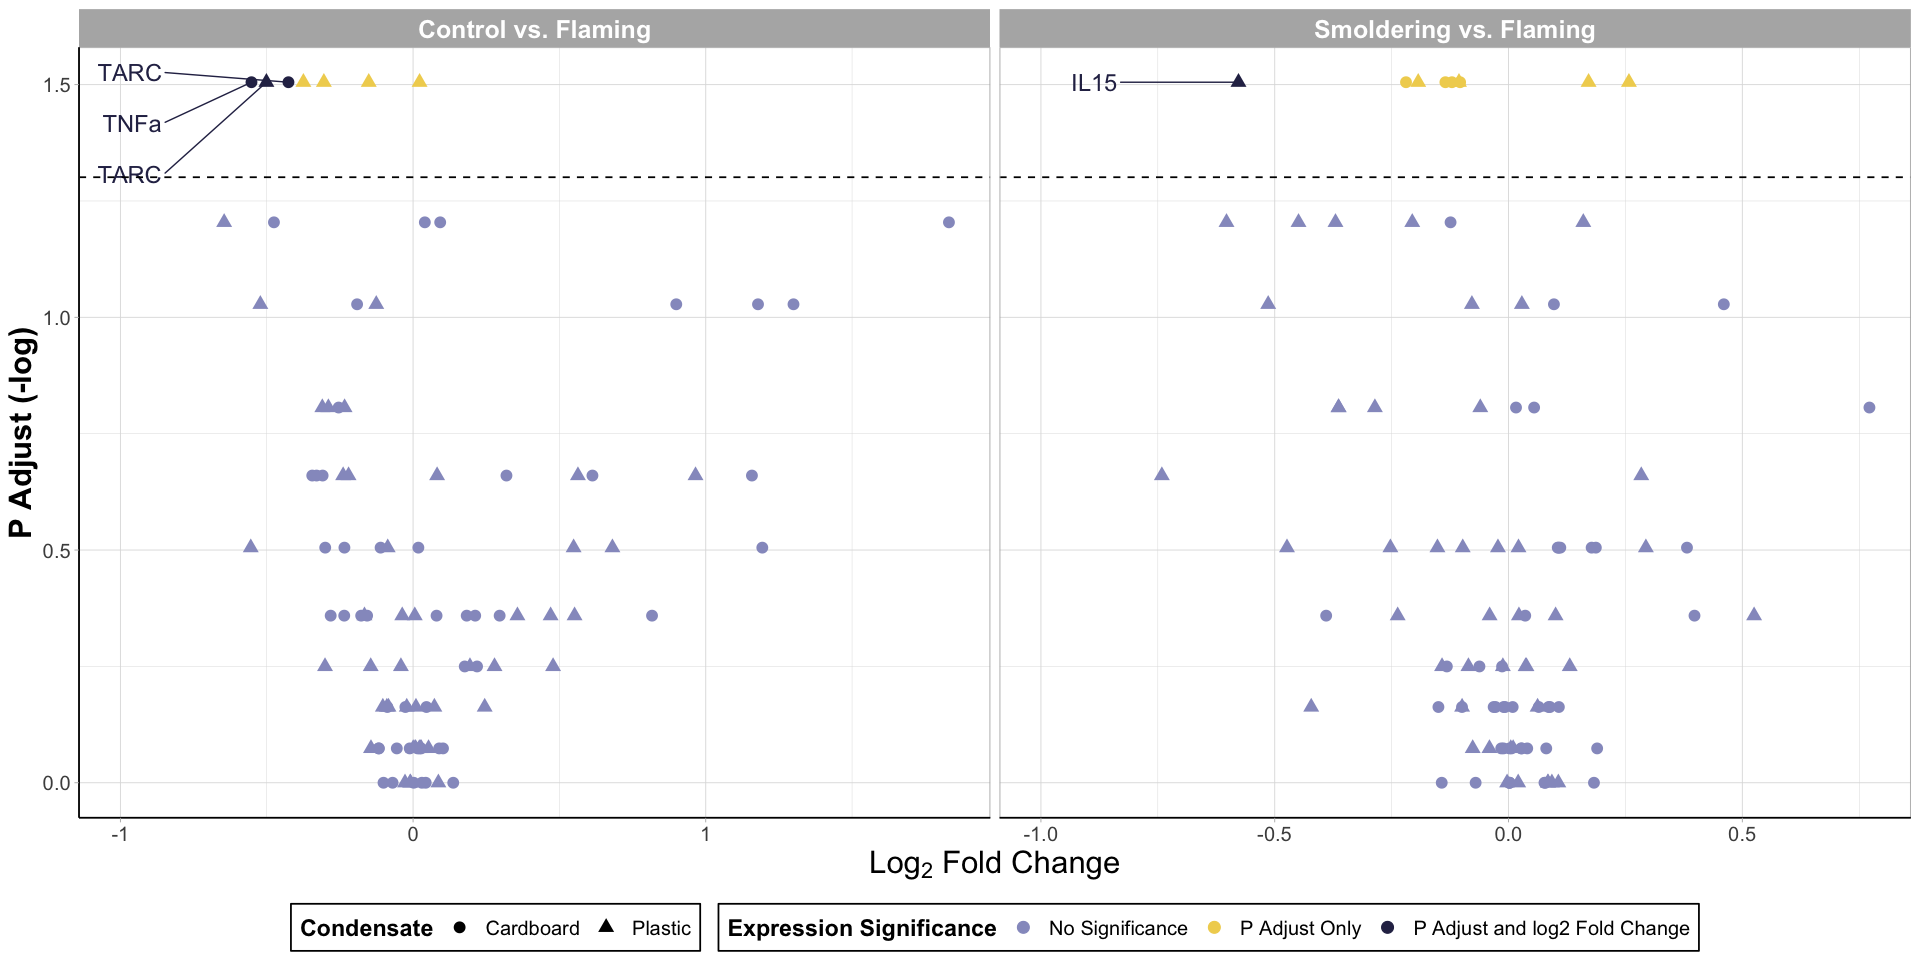

In [4]:
options(repr.plot.width=16, repr.plot.height=8) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$VanGogh1[[1]]

ggplot() + 
  geom_point(data = cytokine_df, 
             aes(x = log2FC, y = -log10(P.Value), color = diffexpressed, shape = Condensate), size = 3) + 
  xlim(-1, NA) + # changes the limits of the x axis

  #labeling points with statistical significance and FC
  geom_text_repel(data = cytokine_df %>%
                      filter(log2FC > log2(1.3) & diffexpressed == "P Adjust and log2 Fold Change"), 
    aes(x = log2FC, y = -log10(P.Value), label = Cytokine, color = diffexpressed),
    xlim = c(2, NA),
    hjust = 0,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  geom_text_repel(data = cytokine_df %>%
                      filter(log2FC < log2(1.3) & diffexpressed == "P Adjust and log2 Fold Change"), 
    aes(x = log2FC, y = -log10(P.Value), label = Cytokine, color = diffexpressed),
    xlim = c(NA, -0.8),
    hjust = 0,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  # P Adjust line
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 

  facet_wrap(~Comparison, scales = "free_x") + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Adjust (-log)') + 

  scale_color_manual(name = "Expression Significance",
                      values = c(metbrewer_colors[4], '#F0D25E', metbrewer_colors[1]))